In [36]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import preprocess_input
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dense, Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import image
from matplotlib import image as im
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
import numpy as np
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt

In [37]:
train_path="AML_project/train"
test_path="AML_project/test"
IMG_SIZE = 224 # MobilenetV2

In [42]:
train_bird_dict = {}

with open('AML_project/list/train.txt') as txt_file:
    lines =  [x.strip() for x in txt_file.readlines()]
    # train_bird_name = [x.split(' ')[0].split('_0')[0] for x in lines]
    train_plant_class = [x.split(' ')[1] for x in lines]

# for i in range(len(train_bird_name)):
#     train_bird_dict[train_bird_class[i]] = train_bird_name[i]

# test_bird_list = []

with open('AML_project/list/groundtruth.txt') as txt_file:
    lines =  [x.strip() for x in txt_file.readlines()]
    test_plant_fileName = [x.split(' ')[0] for x in lines]
    test_plant_class = [x.split(' ')[1] for x in lines]

# for i in range(len(test_bird_name)):
#     test_bird_list.append(test_bird_name[i] + " " + test_bird_class[i])

#remove the duplicate value in list and create the plant folders by using the elements in the list
def remove_duplicate_list(duplicate):
    final_list = []
    for num in duplicate:
        if num not in final_list:
            final_list.append(num)
    return final_list

plant_folder = remove_duplicate_list(test_plant_class)

os.mkdir(os.path.join(test_path, "field"))
os.mkdir(os.path.join(test_path, "herbarium"))
#create the plant folder 
for plant in plant_folder:
    if not os.path.exists(plant):
        os.mkdir(os.path.join(test_path + "/field", plant))
        os.mkdir(os.path.join(test_path + "/herbarium", plant))
    else:
        continue 


#move the testing image is test file to each plant species folder by its label
for i in range(len(test_plant_fileName)):
    if test_plant_fileName[i][-4:] == ".jpg":
        folder_path = test_plant_class[i]
        shutil.move(os.getcwd() + '/AML_Project/' + test_plant_fileName[i], os.getcwd() +'/' + test_path + '/field/' + folder_path)

In [44]:
for i in os.listdir(train_path + "/herbarium"):
    all_files_in_folder = len(os.listdir(train_path + "/herbarium/" + i))
    files_to_move = round(all_files_in_folder * 0.3)
    for index, j in enumerate(os.listdir(train_path + "/herbarium/" + i)):
        if (index + 1) == files_to_move:
            break
        shutil.move(os.getcwd() + '/AML_Project/train/herbarium/' + i + "/" + j, os.getcwd() + '/AML_Project/test/herbarium/' + i)

In [ ]:
#combine both folder into 1
# for i in os.listdir(train_path + "/photo"):
#     for j in os.listdir(train_path + "/photo/" + i):
#         shutil.move(os.getcwd() + '/AML_Project/train/photo/' + i + "/" + j, os.getcwd() + '/AML_Project/train/herbarium/' + i)

NotADirectoryError: [Errno 20] Not a directory: 'AML_project/train/photo/.DS_Store'

In [45]:
#declare plant species dictionary
plant_species_dict = {}
with open('AML_project/list/species_list.txt') as txt_file:
    lines =  [x.strip() for x in txt_file.readlines()]
    plant_class = [x.split('; ')[0] for x in lines]
    plant_species = [x.split('; ')[1] for x in lines]

for i in range(len(plant_class)):
    plant_species_dict[plant_class[i]] = plant_species[i]

plant_species_dict

{'105951': 'Maripa glabra Choisy',
 '106023': 'Merremia umbellata (L.) Hallier f.',
 '106387': 'Costus arabicus L.',
 '106461': 'Costus scaber Ruiz Pav.',
 '106466': 'Costus spiralis (Jacq.) Roscoe',
 '110432': 'Evodianthus funifer (Poit.) Lindm.',
 '116853': 'Pteridium arachnoideum (Kaulf.) Maxon',
 '119986': 'Olfersia cervina (L.) Kunze',
 '120497': 'Diospyros capreifolia Mart. ex Hiern',
 '121836': 'Sloanea grandiflora Sm.',
 '121841': 'Sloanea guianensis (Aubl.) Benth.',
 '12254': 'Anacardium occidentale L.',
 '12518': 'Mangifera indica L.',
 '125412': 'Sphyrospermum cordifolium Benth.',
 '126895': 'Syngonanthus caulescens (Poir.) Ruhland',
 '127007': 'Tonina fluviatilis Aubl.',
 '127097': 'Erythroxylum fimbriatum Peyr.',
 '127151': 'Erythroxylum macrophyllum Cav.',
 '127242': 'Erythroxylum squamatum Sw.',
 '12910': 'Spondias mombin L.',
 '12922': 'Tapirira guianensis Aubl.',
 '129645': 'Croton schiedeanus Schltdl.',
 '130657': 'Euphorbia cotinifolia L.',
 '131079': 'Euphorbia hete

In [46]:
BATCH_SIZE = 64
herbarium_train_dataset = tf.keras.utils.image_dataset_from_directory(train_path + "/herbarium",
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=(IMG_SIZE, IMG_SIZE)
                                                            )

# field_train_dataset = tf.keras.utils.image_dataset_from_directory(train_path + "/photo",
#                                                             shuffle=True,
#                                                             batch_size=BATCH_SIZE,
#                                                             image_size=(IMG_SIZE, IMG_SIZE)
#                                                             )

Found 2568 files belonging to 100 classes.
Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-11-30 16:05:26.141640: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-30 16:05:26.142438: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [47]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(test_path,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=(IMG_SIZE, IMG_SIZE)
                                                                 )

Found 1339 files belonging to 2 classes.


In [48]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=5),
         ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
#Early stopping to avoid overfitting of model

2022-11-25 14:19:58.038714: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-25 14:19:58.038973: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


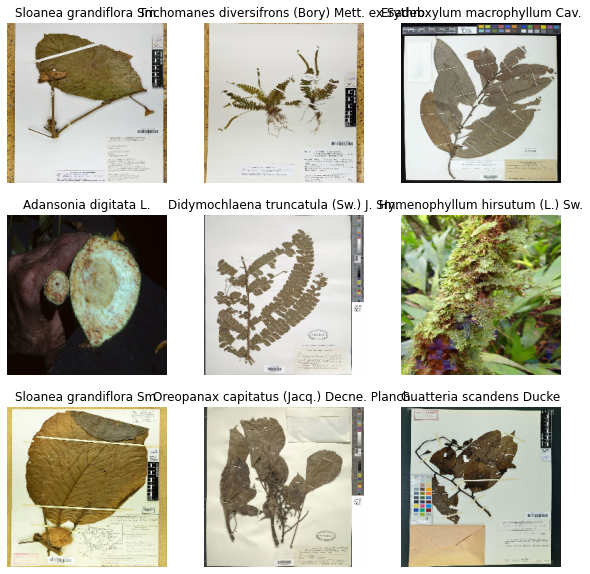

In [ ]:
# Show the first nine images and labels from the training set 
herbarium_class_names = herbarium_train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in herbarium_train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(plant_species_dict[herbarium_class_names[labels[i]]])
    plt.axis("off")

# Show the first nine images and labels from the training set 
# field_class_names = field_train_dataset.class_names

# plt.figure(figsize=(10, 10))
# for images, labels in field_train_dataset.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(plant_species_dict[field_class_names[labels[i]]])
#     plt.axis("off")

In [ ]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [ ]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 4
Number of test batches: 0


In [ ]:
# image augmentation
with tf.device('/cpu:0'):
  data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.25)
  ])

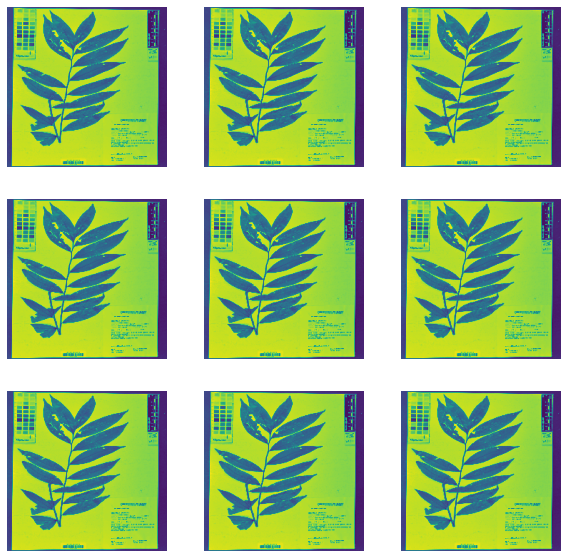

In [ ]:
for image, _ in herbarium_train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    # augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    augmented_image = tf.image.rgb_to_grayscale(first_image)
    # augmented_image = tf.image.adjust_hue(augmented_image, 0.2)
    plt.imshow(augmented_image)
    plt.axis('off')

# for image, _ in field_train_dataset.take(1):
#   plt.figure(figsize=(10, 10))
#   first_image = image[0]
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
#     plt.imshow(augmented_image[0] / 255)
#     plt.axis('off')

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
rescale = tf.keras.layers.Rescaling(1./255, offset=-1)


In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE) + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
image_batch, label_batch = next(iter(herbarium_train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(64, 7, 7, 1280)


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(64, 1280)


In [ ]:
prediction_layer = tf.keras.layers.Dense(100, activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(64, 100)


In [ ]:
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = Dropout(0.5)(x)
outputs = prediction_layer(x)
model = Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0     

In [ ]:
initial_epochs = 10

In [ ]:
history = model.fit(herbarium_train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10


/Users/kyronling/miniforge3/envs/tf-2.6/lib/python3.9/site-packages/keras/backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(
2022-11-25 14:23:59.748262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 5.5049 - accuracy: 0.0095

2022-11-25 14:24:48.194596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 53s 649ms/step - loss: 5.5049 - accuracy: 0.0095 - val_loss: 4.7523 - val_accuracy: 0.0048
Epoch 2/10
75/75 [==============================] - 49s 642ms/step - loss: 5.1138 - accuracy: 0.0198 - val_loss: 4.6385 - val_accuracy: 0.0097
Epoch 3/10
75/75 [==============================] - 49s 642ms/step - loss: 4.8857 - accuracy: 0.0297 - val_loss: 4.5456 - val_accuracy: 0.0193
Epoch 4/10
75/75 [==============================] - 50s 650ms/step - loss: 4.6904 - accuracy: 0.0483 - val_loss: 4.4737 - val_accuracy: 0.0386
Epoch 5/10
75/75 [==============================] - 50s 645ms/step - loss: 4.5099 - accuracy: 0.0556 - val_loss: 4.4099 - val_accuracy: 0.0580
Epoch 6/10
75/75 [==============================] - 50s 645ms/step - loss: 4.3420 - accuracy: 0.0696 - val_loss: 4.3538 - val_accuracy: 0.0773
Epoch 7/10
75/75 [==============================] - 49s 643ms/step - loss: 4.2038 - accuracy: 0.0871 - val_loss: 4.3036 - val_accuracy: 0.1014
Epoch 8/10

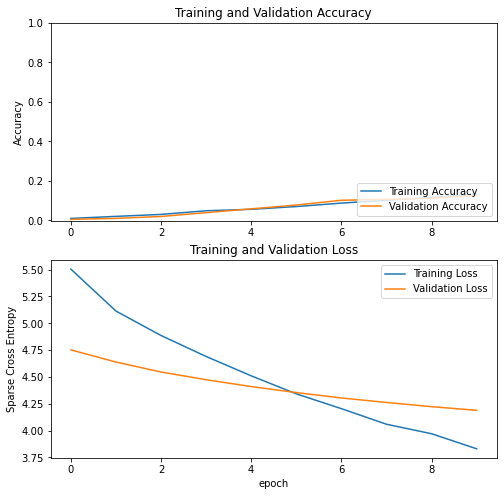

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Sparse Cross Entropy')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
accuracy_score = model.evaluate(validation_dataset)

print("Accuracy: {:.2f}%".format(accuracy_score[1] * 100))

4/4 [==============================] - 2s 367ms/step - loss: 4.1883 - accuracy: 0.1256
Accuracy: 12.56%


In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 30

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              # optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0     

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(herbarium_train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset,
                         callbacks=callbacks)

Epoch 10/20


2022-11-25 14:33:00.787423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 3.7494 - accuracy: 0.1435

2022-11-25 14:34:25.048433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 90s 1s/step - loss: 3.7494 - accuracy: 0.1435 - val_loss: 4.1603 - val_accuracy: 0.1449


/Users/kyronling/miniforge3/envs/tf-2.6/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 11/20
75/75 [==============================] - 85s 1s/step - loss: 3.6093 - accuracy: 0.1627 - val_loss: 4.1208 - val_accuracy: 0.1594
Epoch 12/20
75/75 [==============================] - 85s 1s/step - loss: 3.4556 - accuracy: 0.1916 - val_loss: 4.1128 - val_accuracy: 0.1787
Epoch 13/20
75/75 [==============================] - 86s 1s/step - loss: 3.3792 - accuracy: 0.1920 - val_loss: 4.0547 - val_accuracy: 0.1691
Epoch 14/20
75/75 [==============================] - 85s 1s/step - loss: 3.3030 - accuracy: 0.2205 - val_loss: 4.0356 - val_accuracy: 0.1981
Epoch 15/20
75/75 [==============================] - 84s 1s/step - loss: 3.2308 - accuracy: 0.2218 - val_loss: 4.0708 - val_accuracy: 0.1932
Epoch 16/20
75/75 [==============================] - 82s 1s/step - loss: 3.1288 - accuracy: 0.2447 - val_loss: 4.0316 - val_accuracy: 0.1981
Epoch 17/20
75/75 [==============================] - 82s 1s/step - loss: 3.0543 - accuracy: 0.2586 - val_loss: 3.9515 - val_accuracy: 0.1932
Epoch 18/20
7

In [ ]:
accuracy_score = model.evaluate(validation_dataset, batch_size=BATCH_SIZE)
print("First Fine-tuned Accuracy: {:.2f}%".format(accuracy_score[1] * 100))

4/4 [==============================] - 3s 442ms/step - loss: 3.8943 - accuracy: 0.2174
First Fine-tuned Accuracy: 21.74%


In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

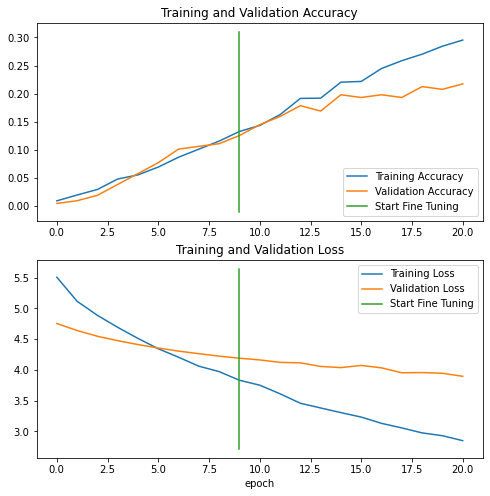

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
# plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
# plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              # optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              metrics=['accuracy'])

In [ ]:
fine_tune_epochs = 10
total_epochs =  20 + fine_tune_epochs

history_fine = model.fit(herbarium_train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history_fine.epoch[-1],
                         validation_data=validation_dataset,
                         callbacks=callbacks)

Epoch 10/30


2022-11-25 14:53:14.768015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 2.8635 - accuracy: 0.2955

2022-11-25 14:54:44.564989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 97s 1s/step - loss: 2.8635 - accuracy: 0.2955 - val_loss: 3.9218 - val_accuracy: 0.2174
Epoch 11/30


KeyboardInterrupt: 